In [34]:
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from IPython.display import Markdown, display
from sklearn import preprocessing 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
Markdown(open('material/project_details_regression.md', encoding='utf-8').read())

# Project details - regression

**Background**: You are working as an analyst for a real estate company. Your company wants to build a machine learning model to predict the selling prices of houses based on a variety of features on which the value of the house is evaluated.

**Objective**: The task is to build a model that will predict the price of a house based on features provided in the dataset. The senior management also wants to explore the characteristics of the houses using some business intelligence tool. One of those parameters include understanding which factors are responsible for higher property value - \$650K and above.
The questions have been provided later in the document for which you can use tableau.

**Data**: The data set consists of information on some 22,000 properties.  The dataset consisted of historic data of houses sold between May 2014 to May 2015.
These are the definitions of data points provided:
(Note: For some of the variables that are self explanatory, no definition has been provided)

- **Id**: Unique identification number for the property.
- **date**: date the house was sold.
- **price**: price of the house.
- **waterfront**: house which has a view to a waterfront.
- **condition**: How good the condition is (overall). **1** indicates worn out property and **5** excellent.
- **grade**: Overall grade given to the housing unit, based on King County grading system. 1 poor ,13 excellent.
- **Sqft_above**: square footage of house apart from basement.
- **Sqft_living15**: Living room area in 2015(implies - some renovations). This might or might not have affected the lotsize area.
- **Sqft_lot15**: lotSize area in 2015(implies - some renovations).

### Exploring the data

We encourage you to thoroughly understand your data and take the necessary steps to prepare your data for modeling before building exploratory or predictive models. Since this is a classification model, you can use linear regression for classification for building a model. You are also encouraged to use other models in your project including KNN, decision trees for regression.
To explore the data, you can use the techniques that have been discussed in class. Some of them include using the describe method, checking null values, using _matplotlib_ and _seaborn_ for developing visualizations.
The data has a number of categorical and numerical variables. Explore the nature of data for these variables before you start with the data cleaning process and then data pre-processing (scaling numerical variables and encoding categorical variables).
You will also use tableau to visually explore the data further.

### Model

Use different models to compare the accuracies and find the model that best fits your data. You can use the measures of accuracies that have been discussed in class. Please note that while comparing different models, make sure you use the same measure of accuracy as a benchmark.


In [3]:
Markdown(open('material/tableau_regression.md', encoding='utf-8').read())

# Tableau - Regression

In this part of the project you will work with the data set `regression.xls` and use Tableau to answer the questions below: 

Tableau Questions:

1. Convert the necessary dimensions to measures  (the variables that are categorical in nature). When you use a separate sheet for this question, add a note in that sheet on which columns were changed
2. Plot the distribution of `price` vs. _number of bedrooms_, `price` vs. _number of bathrooms_, `price` vs. _condition_, `price` vs. _floors_, `price` vs. _grade_, `price` vs. _view_, and `price` vs. _waterfront_.
   State your observation for each one of those graphs. Do you see any trends in prices vs the rest of those variables individually? This can also be used for EDA to identify some data cleaning operations that you might need to perform further.
3. Draw scatter plots for `price` vs. `sqft_above`, `price` vs. `sqft_basement`, `price` vs. `living15`, `price` vs. `sqft_lot15`.
4. Identify using tableau which state data is presented to you. Use latitude, longitude, and zip code for this. Color code the zip codes based on the prices to see which areas are more expensive than the others.
5. Create a plot to check which are the more selling properties based on the number of bedrooms in the house. Create a plot of bedrooms vs. count of data points.
6. We want to see the trend in price of houses based on the year built. From our previous plot, we know that most of our customers are interested in three and four bedroom houses. Create a filter on bedroom feature to select those properties and compare the trends in prices using line charts.
7. Create calculated field `year_built_bins` for the column `year_built` by creating buckets as follows, for houses built between 1900 and 1930 - category A, for houses built between 1930 and 1960 - category B, and for houses built between 1960 and 1990 - category C, and for houses built between 1990 and 2015 - category D. Use `IF-ELSE` statement to create the bins/buckets. Compare the prices of houses for the four categories.
8. Now we want to deep dive into the categories we created in the last question. Let’s see how many properties are in each of the categories. Indicate the numbers as labels on each of the three categories.
9. Deep dive in category A, category B, category C and category D using filters. Identify different characteristics/trends for each of the four categories.
10. Create a visually appealing dashboard to represent the information.

**Some points to keep in mind while working on the tableau questions:**

    a) The plots should be well labelled briefly describing the purpose of the plot
    b) Select the chart type that produces an effective outcome for a given scenario
    c) Focus audience attention on the most important data
    d) Use space, color and fonts appropriately
    e) Use correct title for the plots.
    f) Utilize formatted tooltips and descriptive titles
    g) Format the axes wherever necessary
    h) Use caption to add details wherever necessary
    i) Use appropriate level of details with labels and color coding etc.
    j) For the dashboard make sure that the information represented is clear and easy to understand. The user of the dashboard should be able to understand the purpose of the dashboard and should be able to make decisions looking at the plots presented.
    k) You can also use filters wherever appropriate to give the user the flexibility to view different information easily


In [4]:
df = pd.read_excel('material/regression_data.xls')
df.head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  int64         
 8   view           21597 non-null  int64         
 9   condition      21597 non-null  int64         
 10  grade          21597 non-null  int64         
 11  sqft_above     21597 non-null  int64         
 12  sqft_basement  21597 non-null  int64         
 13  yr_built       21597 non-null  int64         
 14  yr_renovated   21597 non-null  int64         
 15  zipcode        2159

In [6]:
df.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [7]:
df.nunique()

id               21420
date               372
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
price             3622
dtype: int64

In [8]:
df.loc[df.id.duplicated(),:].sort_values(by='id', axis=0, ascending=True)

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
2495,1000102,2015-04-22,6,3.00,2400,9373,2.0,0,0,3,...,2400,0,1991,0,98002,47.3262,-122.214,2060,7316,300000
16801,7200179,2015-04-24,2,1.00,840,12750,1.0,0,0,3,...,840,0,1925,0,98055,47.4840,-122.211,1480,6969,175000
11422,109200390,2014-10-20,3,1.75,1480,3900,1.0,0,0,4,...,1480,0,1980,0,98023,47.2977,-122.367,1830,6956,250000
12406,123039336,2014-12-08,1,1.00,620,8261,1.0,0,0,3,...,620,0,1939,0,98106,47.5138,-122.364,1180,8244,244900
7786,251300110,2015-01-14,3,2.25,2510,12013,2.0,0,0,3,...,2510,0,1988,0,98003,47.3473,-122.314,1870,8017,358000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2492,9407110710,2015-02-26,3,1.75,1510,8400,1.0,0,0,2,...,980,530,1979,0,98045,47.4476,-121.771,1500,10125,322000
4918,9809000020,2015-03-13,5,2.25,3120,16672,2.0,0,0,4,...,3120,0,1969,0,98004,47.6458,-122.219,3740,17853,1940000
6340,9828200460,2015-01-06,2,1.00,700,4800,1.0,0,0,3,...,700,0,1922,0,98122,47.6147,-122.300,1440,4800,430000
15186,9834200305,2015-02-10,3,1.00,1790,3876,1.5,0,0,5,...,1090,700,1904,0,98144,47.5750,-122.288,1360,4080,615000


In [9]:
df.loc[df['id'] == 6021501535]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
93,6021501535,2014-07-25,3,1.5,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.687,-122.386,1570,4500,430000
94,6021501535,2014-12-23,3,1.5,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.687,-122.386,1570,4500,700000


In [10]:
a = df['view'].unique()
a

array([0, 3, 4, 2, 1], dtype=int64)

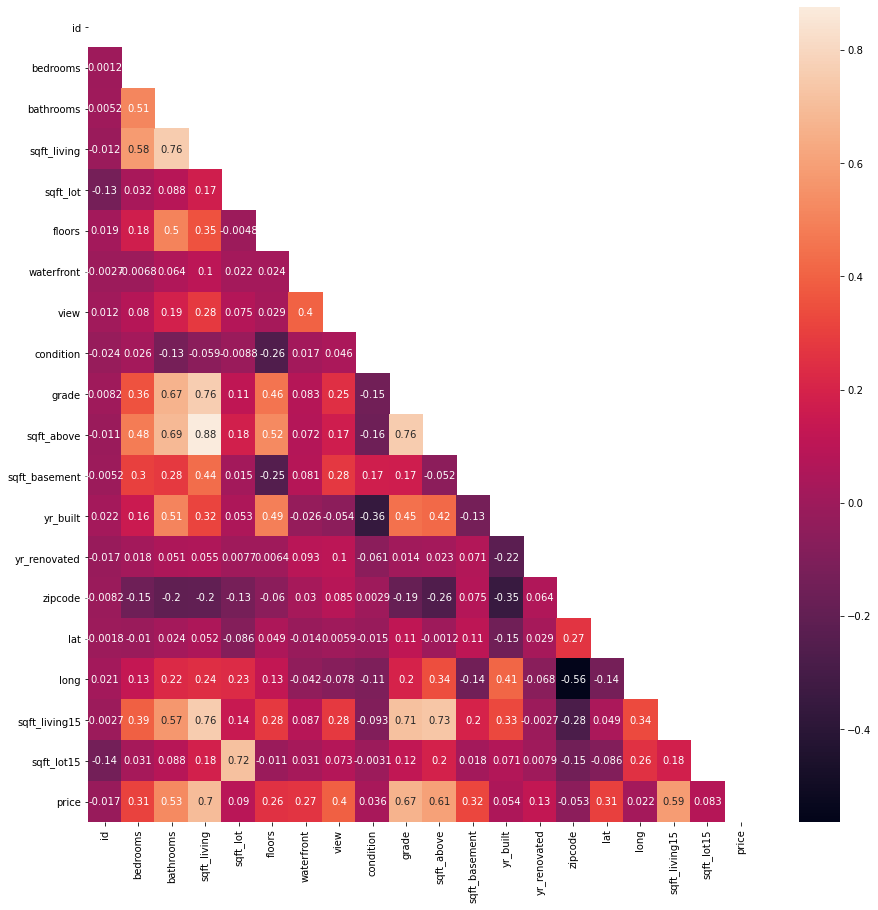

In [11]:
df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

In [12]:
#Checking uniques in columns with less than 100 unique values.
def check_unique_values(x):
    for col in x.columns:
        if x[col].nunique() < 100:
            print(col, x[col].unique())

check_unique_values(df)

bedrooms [ 3  2  4  5  1  6  7  8  9 11 10 33]
bathrooms [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
floors [1.  2.  1.5 3.  2.5 3.5]
waterfront [0 1]
view [0 3 4 2 1]
condition [3 5 4 1 2]
grade [ 7  6  8 11  9  5 10 12  4  3 13]
yr_renovated [   0 1991 2002 2010 1999 1992 2013 1994 1978 2005 2008 2003 1984 1954
 2014 2011 1974 1983 1945 1990 1988 1957 1977 1981 1995 2000 1998 1970
 1989 2004 1986 2009 2007 1987 1973 2006 1985 2001 1980 1971 1979 1997
 1950 1969 1948 2015 1968 2012 1963 1951 1993 1962 1996 1972 1953 1955
 1982 1956 1940 1976 1946 1975 1958 1964 1959 1960 1967 1965 1934 1944]
zipcode [98178 98125 98028 98136 98074 98053 98003 98198 98146 98038 98007 98115
 98107 98126 98019 98103 98002 98133 98040 98092 98030 98119 98112 98052
 98027 98117 98058 98001 98056 98166 98023 98070 98148 98105 98042 98008
 98059 98122 98144 98004 98005 98034 98075 98116 98010 98118 98199 9

In [13]:
#Creating a function that divides the data into categorical and numerical, and subdivides the numerical in
#continous and discrete, the filter used for this was 10000 which is almost 50% of the dataframe rows.

def continuous_discrete(x):
    discrete = []
    continuous = []
    categorical = x.select_dtypes(include = np.object)
    numerical = x.select_dtypes(include = np.number)
    for col in numerical.columns:
        if numerical[col].nunique() > 10000:
            continuous.append(col)
        else:
            discrete.append(col)
    return x[discrete],x[continuous],categorical

discrete,continuous,categorical = continuous_discrete(df)

<ipython-input-13-3fe0923fb54f>:7: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical = x.select_dtypes(include = np.object)


In [14]:
continuous

,id
0,7129300520
1,6414100192
2,5631500400
3,2487200875
4,1954400510
...,...
21592,263000018
21593,6600060120
21594,1523300141
21595,291310100


In [15]:
discrete

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,538000
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21593,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21594,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21595,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [16]:
categorical

""
0
1
2
3
4
...
21592
21593
21594
21595


In [17]:
#Double checking the count of total unique values per column in order to better understand some data points
for col in df.columns:
    if df[col].nunique():
        print(col, df[col].nunique())

id 21420
date 372
bedrooms 12
bathrooms 29
sqft_living 1034
sqft_lot 9776
floors 6
waterfront 2
view 5
condition 5
grade 11
sqft_above 942
sqft_basement 306
yr_built 116
yr_renovated 70
zipcode 70
lat 5033
long 751
sqft_living15 777
sqft_lot15 8682
price 3622


In [18]:
#Checking how many id's are repeated since the total uniques is less than the total rows in the dataframe
df.loc[df.id.duplicated(),:]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
94,6021501535,2014-12-23,3,1.50,1580,5000,1.0,0,0,3,...,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,700000
314,4139480200,2014-12-09,4,3.25,4290,12103,1.0,0,3,3,...,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,1400000
325,7520000520,2015-03-11,2,1.00,1240,12092,1.0,0,0,3,...,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,240500
346,3969300030,2014-12-29,4,1.00,1000,7134,1.0,0,0,3,...,1000,0,1943,0,98178,47.4897,-122.240,1020,7138,239900
372,2231500030,2015-03-24,4,2.25,2180,10754,1.0,0,0,5,...,1100,1080,1954,0,98133,47.7711,-122.341,1810,6929,530000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2015-02-19,4,3.50,2910,5260,2.0,0,0,3,...,2910,0,2012,0,98065,47.5168,-121.883,2910,5260,645000
20597,2724049222,2014-12-01,2,2.50,1000,1092,2.0,0,0,3,...,990,10,2004,0,98118,47.5419,-122.271,1330,1466,220000
20654,8564860270,2015-03-30,4,2.50,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000
20764,6300000226,2015-05-04,4,1.00,1200,2171,1.5,0,0,3,...,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,380000


In [19]:
#Visualising the difference between the same id- date and price are not equal, so in order to preserve the
#data and use the id as an id we will need to make some changes to it.
df.loc[df['id'] == 8564860270]

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
20653,8564860270,2014-07-08,4,2.5,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,449990
20654,8564860270,2015-03-30,4,2.5,2680,5539,2.0,0,0,3,...,2680,0,2013,0,98045,47.4759,-121.734,2680,5992,502000


In [20]:
#maybe extract year from the date column
df['year_sold'] = df['date'].dt.year

In [21]:
#Subtract the year sold with the renovated year on a new column
df["year_diff"] = df['year_sold'] - df['yr_renovated']

df["year_diff"] = np.where(df["year_diff"]>2000,0,df["year_diff"])

"""for i, row in data.iterrows():
     if row["year_diff"] > 2000:
        data.loc[i]["year_diff"] = 0"""
        

df["year_diff"]

0         0
1        23
2         0
3         0
4         0
         ..
21592     0
21593     0
21594     0
21595     0
21596     0
Name: year_diff, Length: 21597, dtype: int64

In [22]:
#Encoding the zipcode columns.
le = preprocessing.LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])
df['zipcode']

0        66
1        55
2        16
3        58
4        37
         ..
21592    42
21593    60
21594    59
21595    15
21596    59
Name: zipcode, Length: 21597, dtype: int64

In [23]:
#Creating an id
df.set_index('id')

,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,year_sold,year_diff
id,,,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,3,1.00,1180,5650,1.0,0,0,3,7,...,1955,0,66,47.5112,-122.257,1340,5650,221900,2014,0
6414100192,2014-12-09,3,2.25,2570,7242,2.0,0,0,3,7,...,1951,1991,55,47.7210,-122.319,1690,7639,538000,2014,23
5631500400,2015-02-25,2,1.00,770,10000,1.0,0,0,3,6,...,1933,0,16,47.7379,-122.233,2720,8062,180000,2015,0
2487200875,2014-12-09,4,3.00,1960,5000,1.0,0,0,5,7,...,1965,0,58,47.5208,-122.393,1360,5000,604000,2014,0
1954400510,2015-02-18,3,2.00,1680,8080,1.0,0,0,3,8,...,1987,0,37,47.6168,-122.045,1800,7503,510000,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263000018,2014-05-21,3,2.50,1530,1131,3.0,0,0,3,8,...,2009,0,42,47.6993,-122.346,1530,1509,360000,2014,0
6600060120,2015-02-23,4,2.50,2310,5813,2.0,0,0,3,8,...,2014,0,60,47.5107,-122.362,1830,7200,400000,2015,0
1523300141,2014-06-23,2,0.75,1020,1350,2.0,0,0,3,7,...,2009,0,59,47.5944,-122.299,1020,2007,402101,2014,0


In [24]:
"""Droping the columns that will not be used for sure. Like lat and long since they are coordinates and do
not offer any relevant detail to be analysed since we already have the zipcode which is a much better
indicator of the location the houses are in"""

df = df.drop(["lat","long","date","year_sold"], axis=1)

In [25]:
#Removing outliers

def remove_outliers(df, threshold=1.5, in_columns=df.select_dtypes(np.number).columns, skip_columns=[]):
    for column in in_columns:
        if column not in skip_columns:
            upper = np.percentile(df[column],75)
            lower = np.percentile(df[column],25)
            iqr = upper - lower
            upper_limit = upper + threshold * iqr
            lower_limit = lower - threshold * iqr
            df = df[(df[column]>lower_limit) & (df[column]<upper_limit)]
            print (column,df)
    return df

In [26]:
datatest1 = df.copy()

datatest1 = remove_outliers(datatest1, threshold=2, skip_columns=["waterfront","view","yr_renovated","year_diff"])

datatest1

id                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7       

sqft_lot15                id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      7129300520         3       1.00         1180      5650     1.0   
1      6414100192         3       2.25         2570      7242     2.0   
2      5631500400         2       1.00          770     10000     1.0   
3      2487200875         4       3.00         1960      5000     1.0   
4      1954400510         3       2.00         1680      8080     1.0   
...           ...       ...        ...          ...       ...     ...   
21592   263000018         3       2.50         1530      1131     3.0   
21593  6600060120         4       2.50         2310      5813     2.0   
21594  1523300141         2       0.75         1020      1350     2.0   
21595   291310100         3       2.50         1600      2388     2.0   
21596  1523300157         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,price,year_diff
0,7129300520,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,1340,5650,221900,0
1,6414100192,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,1690,7639,538000,23
2,5631500400,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,2720,8062,180000,0
3,2487200875,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,1360,5000,604000,0
4,1954400510,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,1800,7503,510000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,42,1530,1509,360000,0
21593,6600060120,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,60,1830,7200,400000,0
21594,1523300141,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,59,1020,2007,402101,0
21595,291310100,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,15,1410,1287,400000,0


In [27]:
#removing outliers low and high from target variable
q_low = df["price"].quantile(0.03)
q_hi  = df["price"].quantile(0.97)

df = df[(df["price"] < q_hi) & (df["price"] > q_low)]
df["price"].describe()

count    2.028400e+04
mean     5.055711e+05
std      2.321916e+05
min      1.925000e+05
25%      3.297950e+05
50%      4.500000e+05
75%      6.250000e+05
max      1.380000e+06
Name: price, dtype: float64

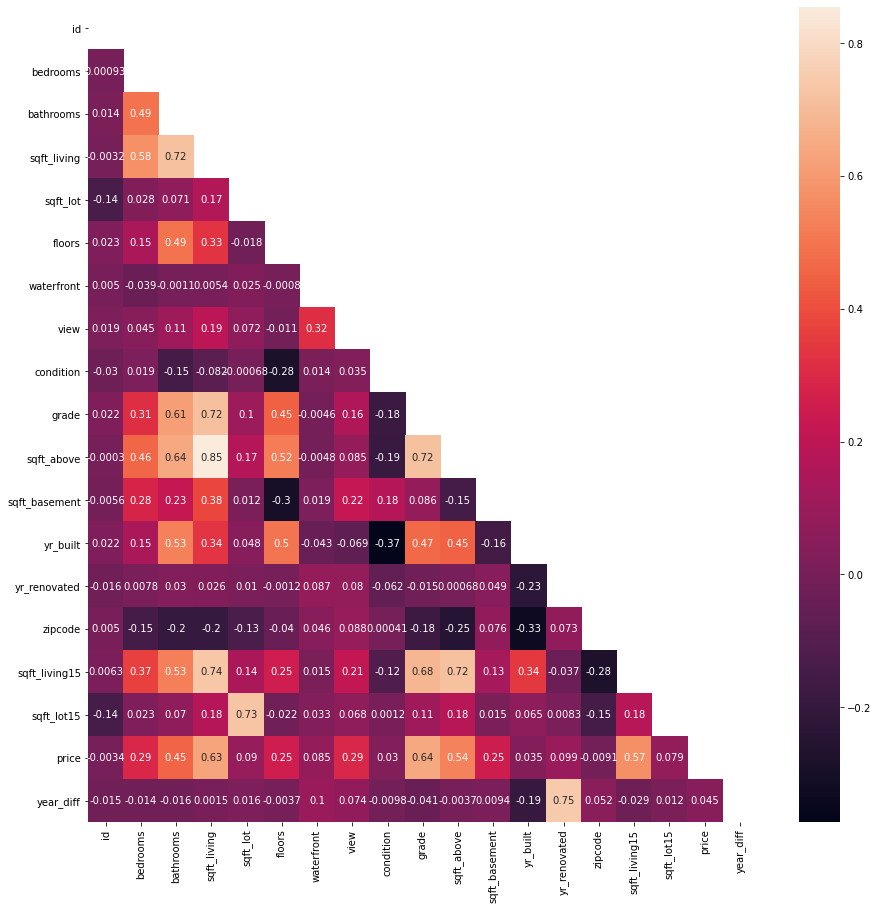

In [28]:
df.corr()
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(df.corr(), mask=mask, annot=True)
plt.show()

In [29]:
df = pd.get_dummies(df, columns=['zipcode'])

In [30]:
# splitting our data

X = df.drop('price', axis=1)
y = df['price']

# using different columns to train and test to get more accurate results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [32]:
predictions = model.predict(X_test)

In [35]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(0.8297588887968406, 68958.86883730137, 96721.83852997333)

In [36]:
mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(68958.86883730137, 96721.83852997333)

In [37]:
import math

results = pd.DataFrame()
results['true'] = y_test
results['pred'] = predictions
results['resid'] = results.apply(lambda x: abs(x['true'] - x['pred']), axis=1)
results

,true,pred,resid
15770,320000,285054.765158,34945.234842
7429,1310000,961253.449824,348746.550176
4778,260000,345216.561628,85216.561628
21045,390000,317701.847153,72298.152847
21539,549000,565500.623264,16500.623264
...,...,...,...
8760,235000,239877.911030,4877.911030
3844,630000,597181.606887,32818.393113
5411,785000,747215.098460,37784.901540
8580,775000,827706.111817,52706.111817


In [38]:
results.sort_values('resid', ascending=False)

,true,pred,resid
21034,900000,1.566891e+06,666891.058666
18670,1050000,4.605835e+05,589416.535248
10830,995000,4.412153e+05,553784.650423
19709,1380000,8.787861e+05,501213.865470
20158,1350000,8.614292e+05,488570.789251
...,...,...,...
3711,240000,2.400735e+05,73.509043
3811,525000,5.250600e+05,59.997330
11408,440500,4.405388e+05,38.753401
8636,329950,3.299170e+05,32.997290


In [39]:
results[results['true'] >= 40]

,true,pred,resid
15770,320000,285054.765158,34945.234842
7429,1310000,961253.449824,348746.550176
4778,260000,345216.561628,85216.561628
21045,390000,317701.847153,72298.152847
21539,549000,565500.623264,16500.623264
...,...,...,...
8760,235000,239877.911030,4877.911030
3844,630000,597181.606887,32818.393113
5411,785000,747215.098460,37784.901540
8580,775000,827706.111817,52706.111817


In [40]:
results.describe()

,true,pred,resid
count,6.086000e+03,6.086000e+03,6086.000000
mean,5.043407e+05,5.043270e+05,68958.868837
std,2.344380e+05,2.125990e+05,67827.312934
min,1.925000e+05,-2.148268e+04,15.307257
25%,3.250000e+05,3.395265e+05,22432.604870
50%,4.493750e+05,4.830850e+05,50110.540888
75%,6.250000e+05,6.375591e+05,92959.355864
max,1.380000e+06,1.566891e+06,666891.058666


C:\Users\Flo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='true', ylabel='pred'>

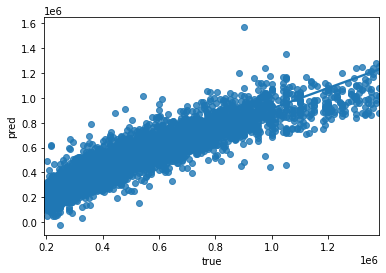

In [41]:
sns.regplot(results['true'], results['pred'])